In [1]:
# import libraries

# for data analysis
import numpy as np
import pandas as pd
from collections import Counter

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sb



In [2]:
df = pd.read_csv("Customer-Churn.csv")

In [3]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [4]:
# checking the columns information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


from the data set above we can see that there are missing values in the Total Charges column 

In [5]:
# checking for the missing data point

df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

missing values are totatally 11 rows

<Axes: >

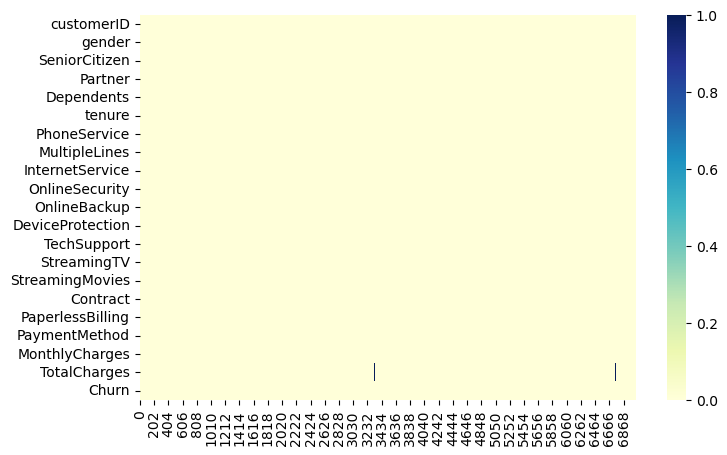

In [6]:
# visualizing the missing values

plt.figure (figsize = (8,5))
sb.heatmap(df.isna().transpose(), cbar= True, cmap= "YlGnBu")

In [7]:
# checking for data duplicates

df.duplicated().sum()

0

In [8]:
# checking for entries that are 0 in the total 

df.TotalCharges[df.TotalCharges==0].count()

0

In [9]:
# checking the summary statistics of numerical data

df.describe().astype(int)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043,7043,7043,7032
mean,0,32,64,2283
std,0,24,30,2266
min,0,0,18,18
25%,0,9,35,401
50%,0,29,70,1397
75%,0,55,89,3794
max,1,72,118,8684


### Data preprocessing

In [10]:
# fill in the missing values in the TotalCharges column with the median

df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [11]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Exploratory Data Analysis (EDA)

### Univariate Analysis

In [188]:
# create a copy of the dataframe to perform EDA so as not to tamper with the original dataframe

df2 = df.copy()
df3 = df.copy()

In [13]:
df2.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

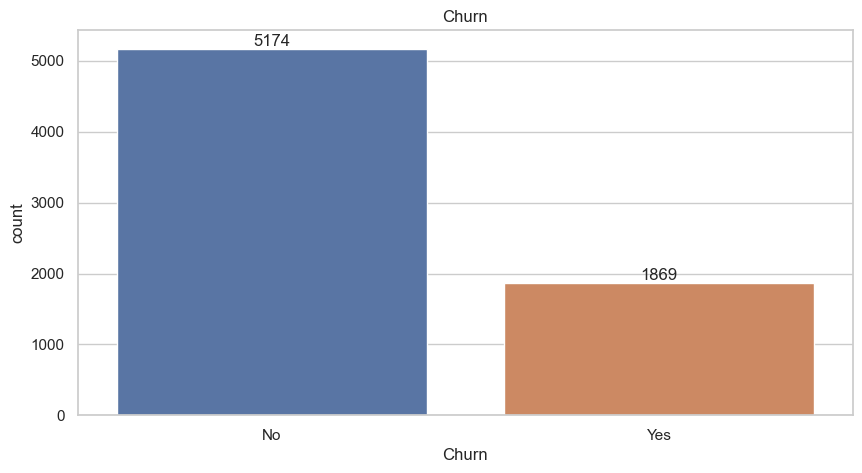

In [203]:
# to check customers who have churned (cancelled their service) or not

plt.figure(figsize = (10,5))
ax = sb.countplot(x =df2["Churn"], order = df2["Churn"].value_counts(ascending=False).index)
values = df2["Churn"].value_counts(ascending = False).values
ax.bar_label(container=ax.containers[0], labels = values);
plt.title("Churn")
100*df2["Churn"].value_counts()/len(df2["Churn"])

1,869 which is 26% subscribers aprox. have canceled their service (churned) 
- it is also observed that this is an imbalance data because the churned vs not churned ratio is not balanced

Male           NaN
Female   -0.951299
Name: gender, dtype: float64


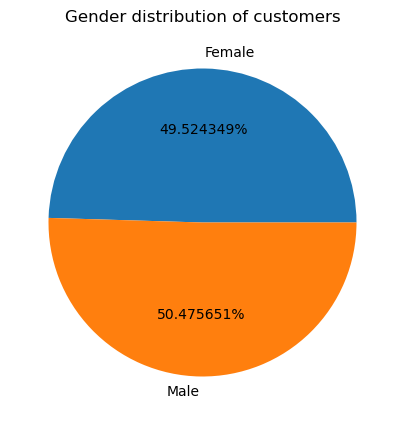

In [14]:
# to get the percentage count difference between genders
gender_counts = df2['gender'].value_counts()
percentage = (gender_counts / len(df2)) * 100
diff_percentage = percentage.diff()
print(diff_percentage)

fig,ax = plt.subplots(figsize=(5,5))
count = Counter (df2["gender"])
ax.pie(count.values(), labels=count.keys(),autopct=lambda p:f'{p:2f}%')
ax.set_title("Gender distribution of customers")
plt.show();

the pie chart above shows the gender distribution of customers , and we can see that the female gender is only -0.95% less than the male gender so there is no disparity in gender distribution. 

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


Text(0.5, 1.0, 'Customer type')

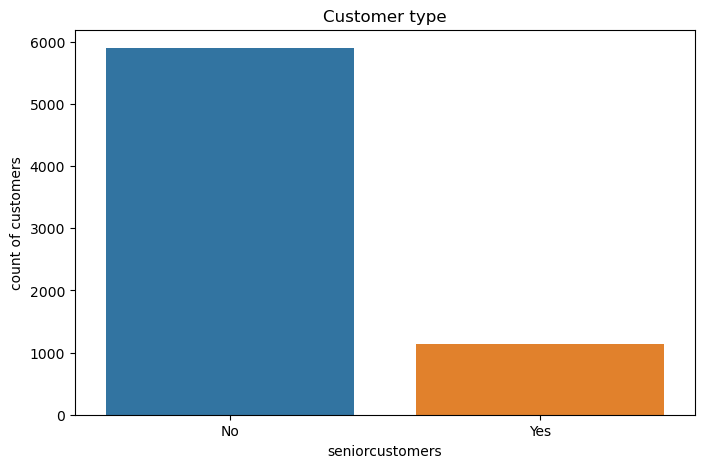

In [15]:
# customer grouping
def seniorcustomers(sc):
    if sc == 1:
        return "Yes"
    else:
        return "No"

df2["seniorcustomers"] = df2["SeniorCitizen"].apply(seniorcustomers)

# total customers in each category
print(df2["SeniorCitizen"].value_counts())

# investigating the count of customer type
plt.figure(figsize = (8,5))
sb.countplot(x= "seniorcustomers", data = df2)
plt.xlabel("seniorcustomers")
plt.ylabel("count of customers")
plt.title("Customer type")

the customer type grouping bar chart above shows that the vast majority of customers using Connecttel services are not senior citizens.

Text(0.5, 1.0, 'Customers with or without partners')

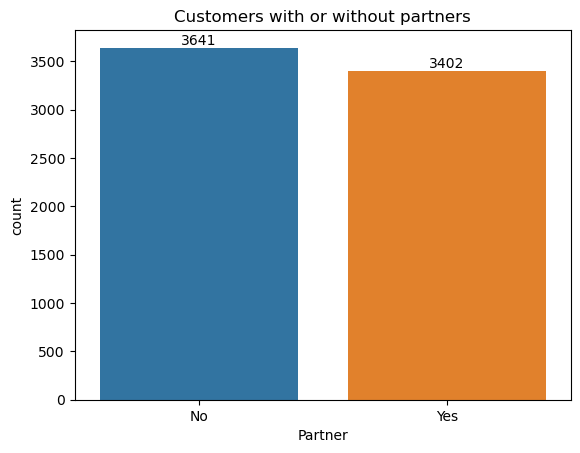

In [16]:
# to visualize customers who have partners and those that do not have partners

ax = sb.countplot(x =df2["Partner"], order = df2["Partner"].value_counts(ascending=False).index)
values = df2["Partner"].value_counts(ascending = False).values
ax.bar_label(container=ax.containers[0], labels = values);
plt.title("Customers with or without partners")

customers without partners are more than those with partners ,although there is not so much difference.

Text(0.5, 1.0, 'Count of customers with or without Dependents')

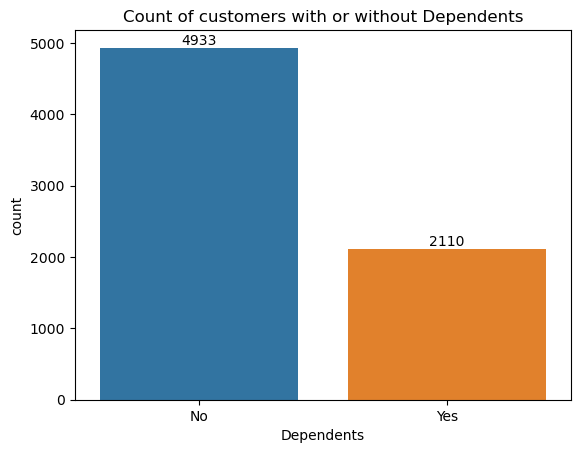

In [17]:
# to visualize the no of customers with or without dependents

ax = sb.countplot(x =df2["Dependents"], order = df2["Dependents"].value_counts(ascending=False).index)
values = df2["Dependents"].value_counts(ascending = False).values
ax.bar_label(container=ax.containers[0], labels = values);
plt.title("Count of customers with or without Dependents")

The chart above shows that Connecttel has 4933 customers without dependents and 2110 customers who has dependents

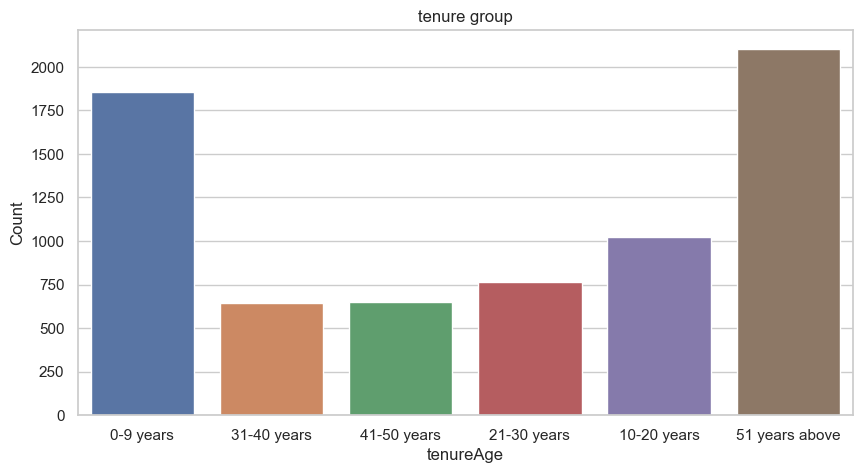

51 years above    29.887832
0-9 years         26.324010
10-20 years       14.539259
21-30 years       10.833452
41-50 years        9.257419
31-40 years        9.158029
Name: tenureAge, dtype: float64

In [213]:
# grouping the customers tenure to determine the loyalty of the customers
def tenureAge(x):
    if x<=9:
        return "0-9 years"
    elif x<=20:
        return "10-20 years"
    elif x<=30:
        return "21-30 years"
    elif x<=40:
        return "31-40 years"
    elif x<=50:
        return "41-50 years"
    else:
        return"51 years above"

df2["tenureAge"] = df2["tenure"].apply(tenureAge)

# Create the barplot
sb.set(style="whitegrid")
plt.figure(figsize=(10, 5))
sb.countplot(x='tenureAge', data=df2)
plt.xlabel('tenureAge')
plt.ylabel('Count')
plt.title('tenure group')
plt.show()
100*df2["tenureAge"].value_counts()/len(df2["tenureAge"])

- aproximately 30% of costumers are above 51years tenure age 
- 26% of customers are below 10years tenure age

Text(0.5, 1.0, 'Phone Service')

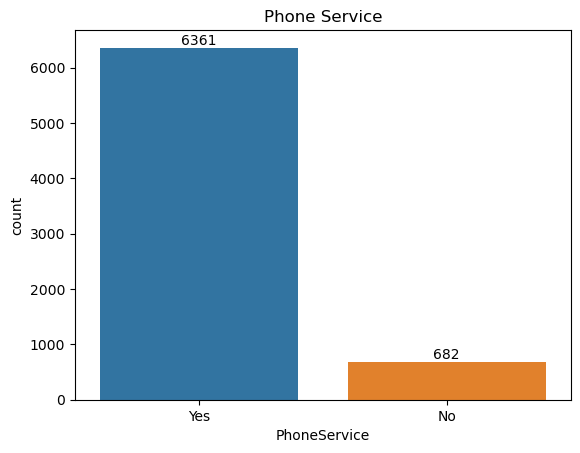

In [19]:
# to visualize the no of customers with or without a phone service

ax = sb.countplot(x =df2["PhoneService"], order = df2["PhoneService"].value_counts(ascending=False).index)
values = df2["PhoneService"].value_counts(ascending = False).values
ax.bar_label(container=ax.containers[0], labels = values);
plt.title("Phone Service")

the chart above shows that only 682 customers do not own a phone service

Text(0.5, 1.0, 'Customers with single or multiple lines')

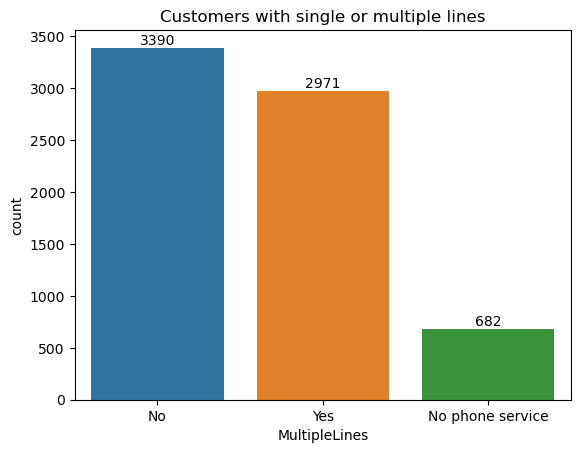

In [20]:
# to visualize the no of customers with multiple lines

ax = sb.countplot(x =df2["MultipleLines"], order = df2["MultipleLines"].value_counts(ascending=False).index)
values = df2["MultipleLines"].value_counts(ascending = False).values
ax.bar_label(container=ax.containers[0], labels = values);
plt.title("Customers with single or multiple lines")

3,390 customers making up the majority of connectel subscribers do not own multiple lines , about 2,971 subscribers own multiple line and 682 customers do not have phone service

Text(0.5, 1.0, 'Internet Service type')

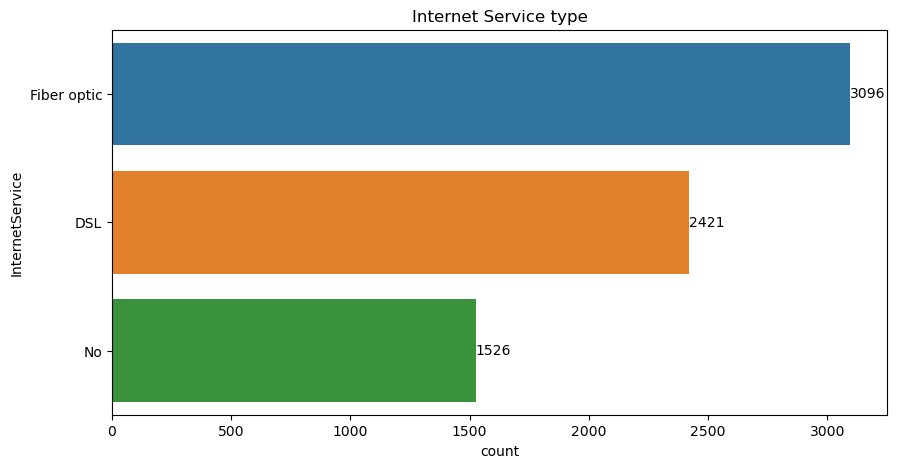

In [21]:
# to determine the most preferred internet service type by customers

plt.figure(figsize = (10,5))
ax = sb.countplot(y =df2["InternetService"], order = df2["InternetService"].value_counts(ascending=False).index)
values = df2["InternetService"].value_counts(ascending = False).values
ax.bar_label(container=ax.containers[0], labels = values);
plt.title("Internet Service type")

the bar chart shows that the most preferred internet service type is the fiber optic followed by DSL and 1,526 subscribers do not use any of the internet service type provided by connectel

Text(0.5, 1.0, 'contract type')

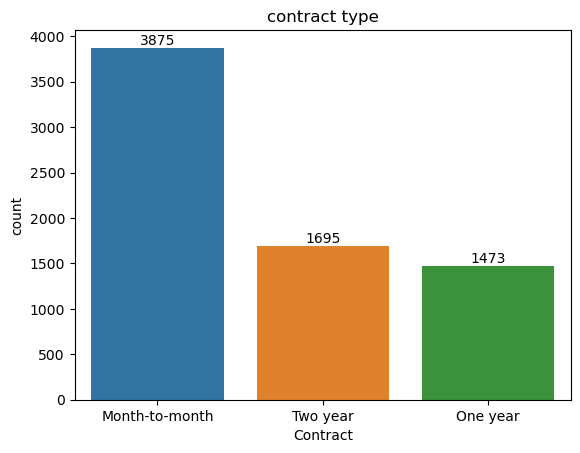

In [22]:
# to visualize the contract types

ax = sb.countplot(x =df2["Contract"], order = df2["Contract"].value_counts(ascending=False).index)
values = df2["Contract"].value_counts(ascending = False).values
ax.bar_label(container=ax.containers[0], labels = values);
plt.title("contract type")

the chart above shows that more than half of the subscribers prefer the month to month contract type , and about 1,695 subscribers prefer the 2 year contract and 1,473 subscribers use the one year contract type

Yes          NaN
No    -18.443845
Name: PaperlessBilling, dtype: float64


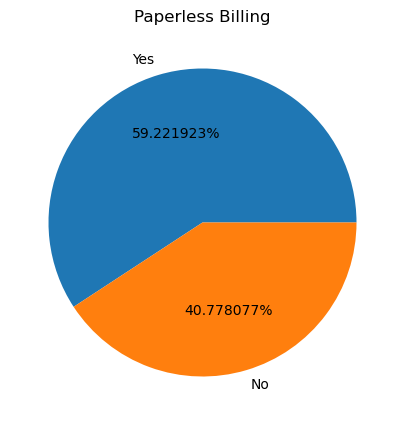

In [23]:
# to get the percentage of those using the paperless billing type 
Billing_type = df2['PaperlessBilling'].value_counts()
percentage = (Billing_type / len(df2)) * 100
diff_percentage = percentage.diff()
print(diff_percentage)

fig,ax = plt.subplots(figsize=(5,5))
count = Counter (df2["PaperlessBilling"])
ax.pie(count.values(), labels=count.keys(),autopct=lambda p:f'{p:2f}%')
ax.set_title("Paperless Billing")
plt.show();

the pie chart shows that 59% of connecttel subscribers are making using of the paperless billing type

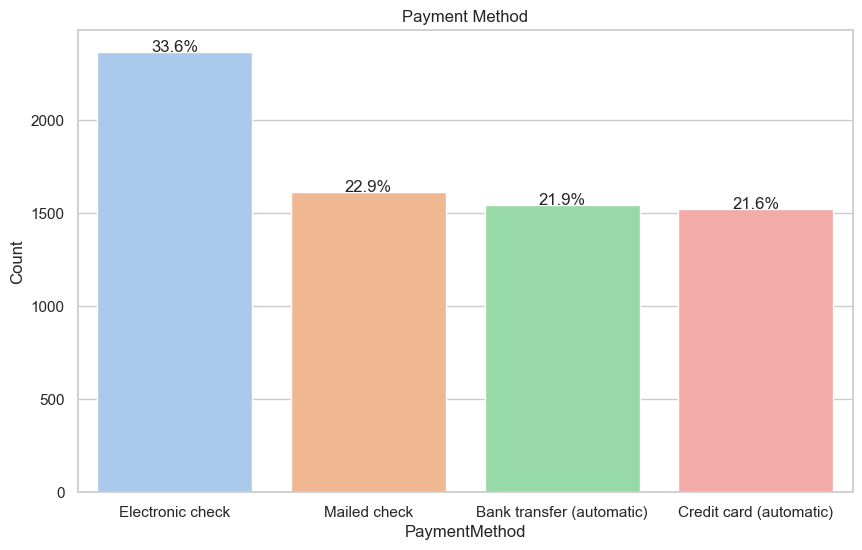

In [257]:
# Calculate the percentage of each category count
total_count = df2['PaymentMethod'].count()
category_counts = df2['PaymentMethod'].value_counts()
category_percentages = (category_counts / total_count) * 100

# Create the barplot
sb.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sb.countplot(x='PaymentMethod', data=df2,palette='pastel')

# Display the percentage values on top of the bars
for i, count in enumerate(category_counts):
    plt.text(i, count + 0.5, f'{category_percentages.iloc[i]:.1f}%', ha='center')

plt.xlabel('PaymentMethod')
plt.ylabel('Count')
plt.title('Payment Method')
plt.show()


the most preferred payment method is the Electronic check followed by mailed check,bank transfer and credit card respectively

## Bivariate Analysis

Text(0.5, 1.0, 'Customer churn by Payment method')

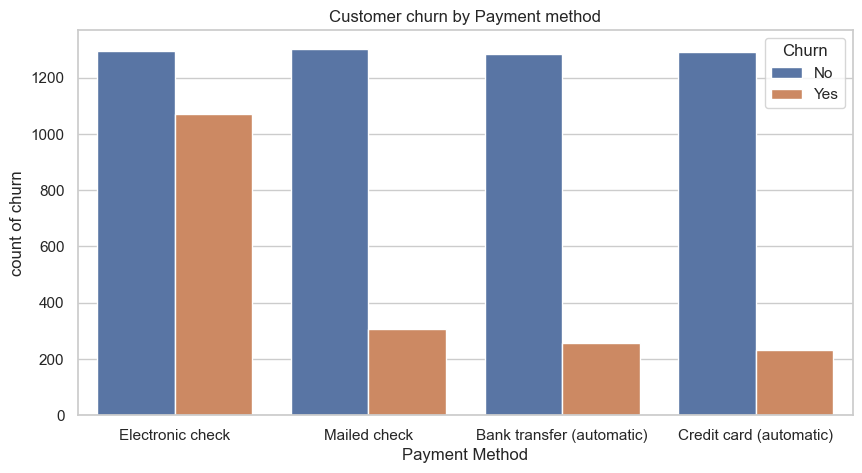

In [27]:
plt.figure(figsize = (10,5))
sb.countplot(x= "PaymentMethod", data = df2, hue = "Churn")
plt.xlabel("Payment Method")
plt.ylabel("count of churn")
plt.title("Customer churn by Payment method")

the plot shows that subscribers who use electronic check churn the most , compared to the remaining payment method

Text(0.5, 1.0, 'Customer churn by contract type')

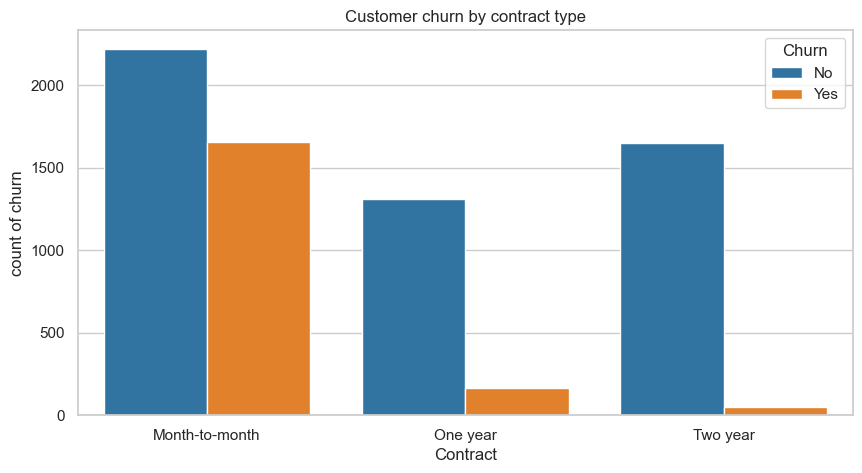

In [69]:
plt.figure(figsize = (10,5))
sb.countplot(x= "Contract", data = df2, hue = "Churn",palette= "tab10")
plt.xlabel("Contract")
plt.ylabel("count of churn")
plt.title("Customer churn by contract type")

from the above plot we can see that customers on month to month contract type churn the most , there is little churn in customers who uses the one year contract but least churn in those with 2year contract, and the most of the customers are subscribed to the month to month contract type.

Text(0.5, 1.0, 'Customer churn by InternetService')

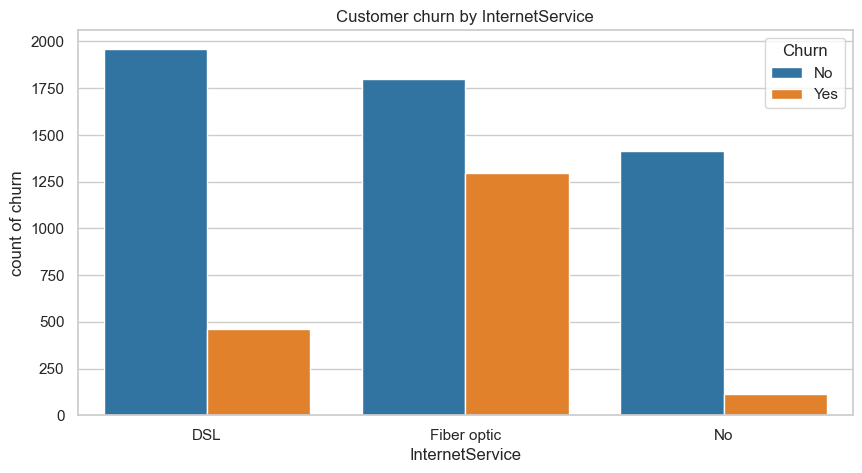

In [65]:
plt.figure(figsize = (10,5))
sb.countplot(x= "InternetService", data = df2, hue = "Churn", palette= "tab10")
plt.xlabel("InternetService")
plt.ylabel("count of churn")
plt.title("Customer churn by InternetService")

a large proportion of fiber optic subscribers are churners

Text(0.5, 1.0, 'Customer churn by Tech Support')

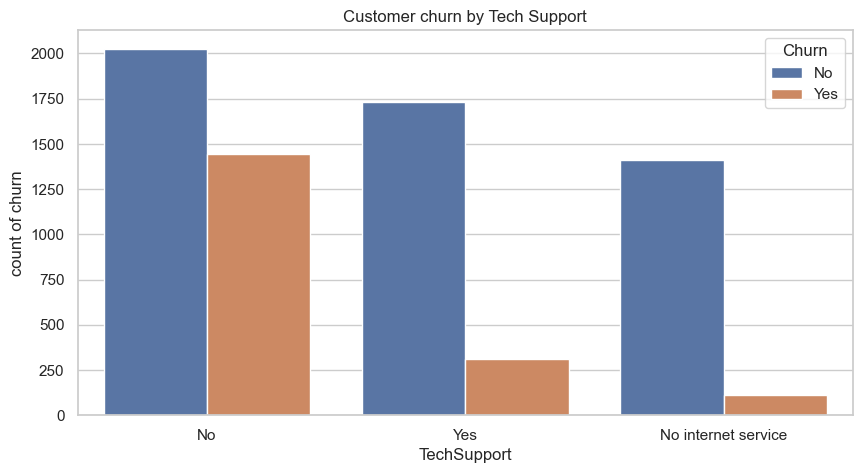

In [70]:
plt.figure(figsize = (10,5))
sb.countplot(x= "TechSupport", data = df2, hue = "Churn")
plt.xlabel("TechSupport")
plt.ylabel("count of churn")
plt.title("Customer churn by Tech Support")

customers without tech support churn the most

Text(0.5, 1.0, 'Customer churn by tenure Age')

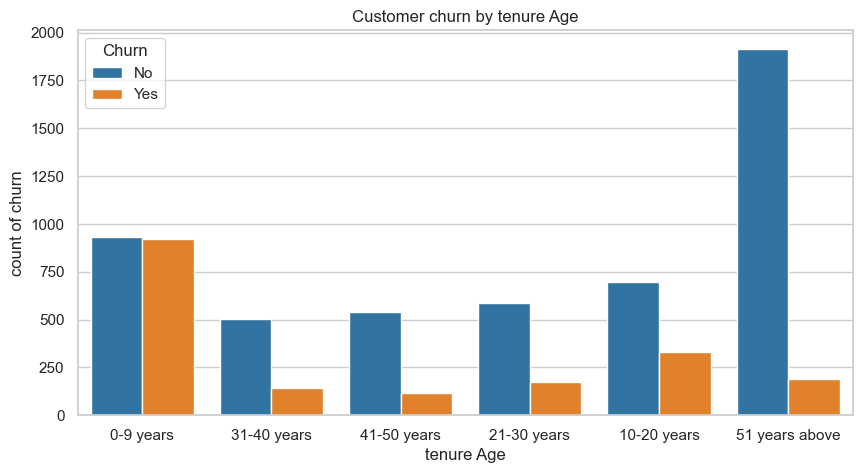

In [209]:
plt.figure(figsize = (10,5))
sb.countplot(x= "tenureAge", data = df2, hue = "Churn",palette= "tab10")
plt.xlabel("tenure Age")
plt.ylabel("count of churn")
plt.title("Customer churn by tenure Age")

- Majority of the customers are above 51 years tenure age
- customers that are less than 10 years tenure age always churn

Text(0.5, 1.0, 'Customer churn by Device Protection')

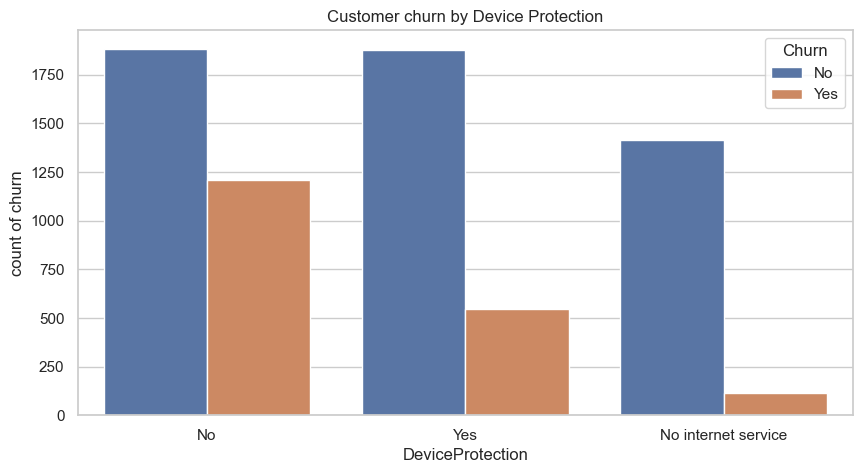

In [74]:
plt.figure(figsize = (10,5))
sb.countplot(x= "DeviceProtection", data = df2, hue = "Churn")
plt.xlabel("DeviceProtection")
plt.ylabel("count of churn")
plt.title("Customer churn by Device Protection")

customers without device protection churn the most 

Text(0.5, 1.0, 'Customer churn by Online Backup')

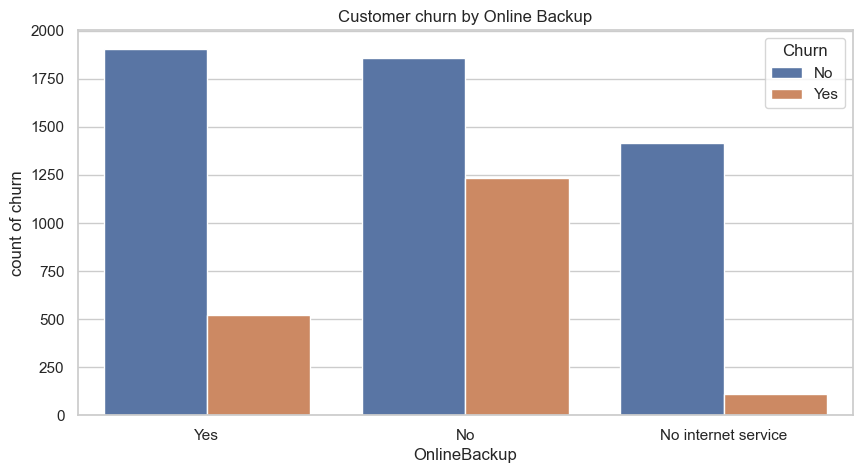

In [81]:
plt.figure(figsize = (10,5))
sb.countplot(x= "OnlineBackup", data = df2, hue = "Churn")
plt.xlabel("OnlineBackup")
plt.ylabel("count of churn")
plt.title("Customer churn by Online Backup")

customers without online backup service has the highest churn 

Text(0.5, 1.0, 'Customer churn by Device Online Security')

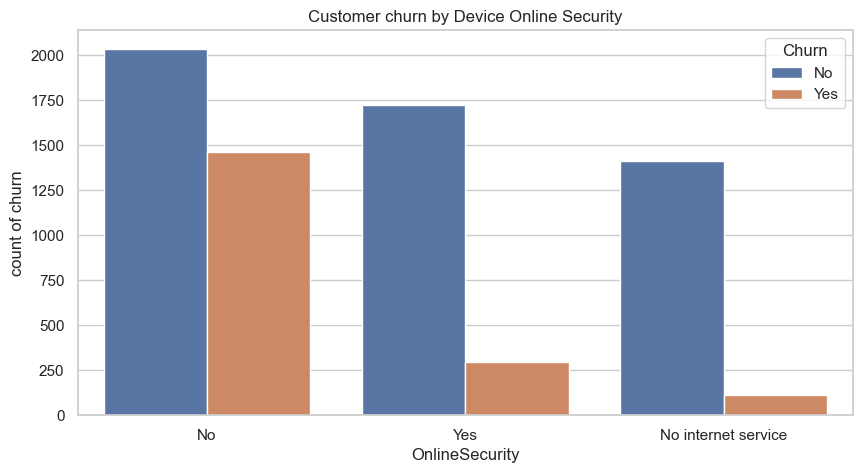

In [79]:
plt.figure(figsize = (10,5))
sb.countplot(x= "OnlineSecurity", data = df2, hue = "Churn")
plt.xlabel("OnlineSecurity")
plt.ylabel("count of churn")
plt.title("Customer churn by Device Online Security")

customers without device online security churn the most compared to those who have online security

Text(0.5, 1.0, 'Customer churn by Paperless Billing')

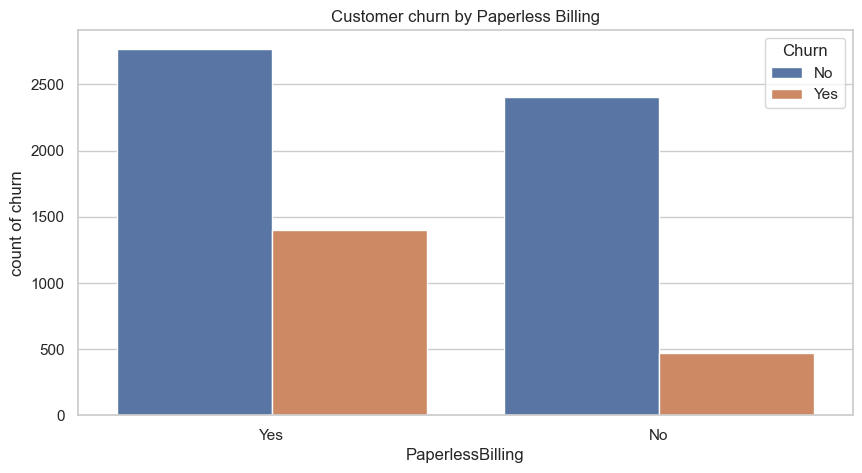

In [88]:
plt.figure(figsize = (10,5))
sb.countplot(x= "PaperlessBilling", data = df2, hue = "Churn")
plt.xlabel("PaperlessBilling")
plt.ylabel("count of churn")
plt.title("Customer churn by Paperless Billing")

customers who use the paperless billing churn the most and those who do not use paperless billing churn less

Text(0.5, 1.0, 'Customer churn by Phone service')

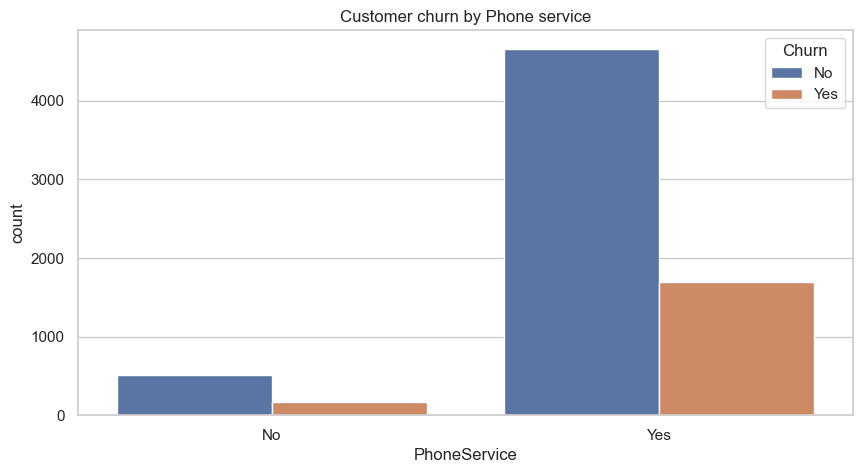

In [262]:
plt.figure(figsize=(10,5))
sb.countplot(x="PhoneService", data =df2 , hue = "Churn")
plt.title("Customer churn by Phone service")

customer who use phone service are high churners

Text(0.5, 1.0, 'Customer churn by gender')

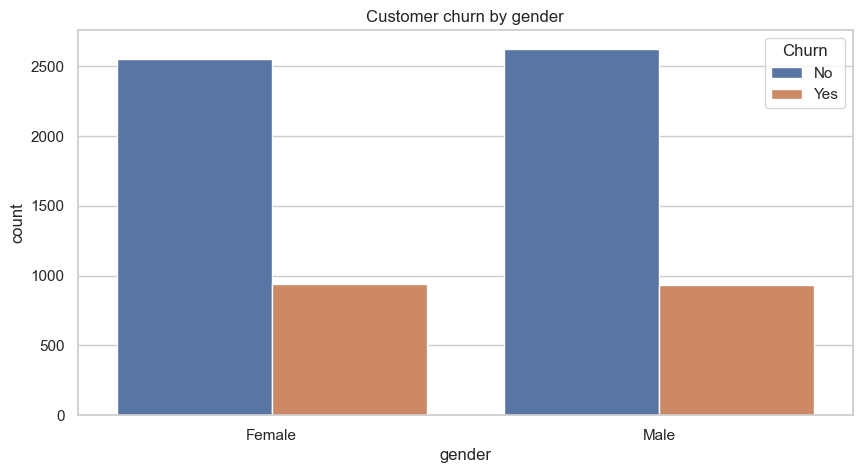

In [263]:
plt.figure(figsize=(10,5))
sb.countplot(x="gender", data =df2 , hue = "Churn")
plt.title("Customer churn by gender")

gender has no impact on churn rate

Text(0.5, 1.0, 'Customer churn by Multiple Lines')

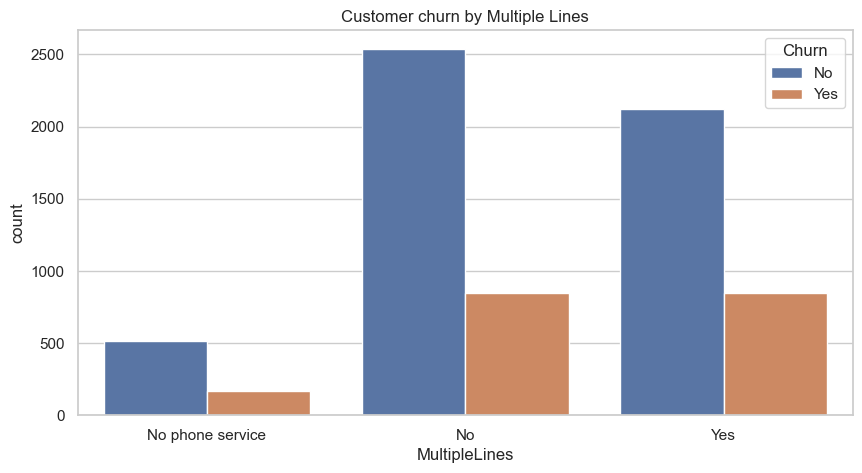

In [264]:
plt.figure(figsize=(10,5))
sb.countplot(x="MultipleLines", data =df2 , hue = "Churn")
plt.title("Customer churn by Multiple Lines")

Customers who do not own multiple lines are high churners if you compare the proportion of those with multiple lines and those without multiple line.

Text(0.5, 1.0, 'Customer churn by Senior Citizen')

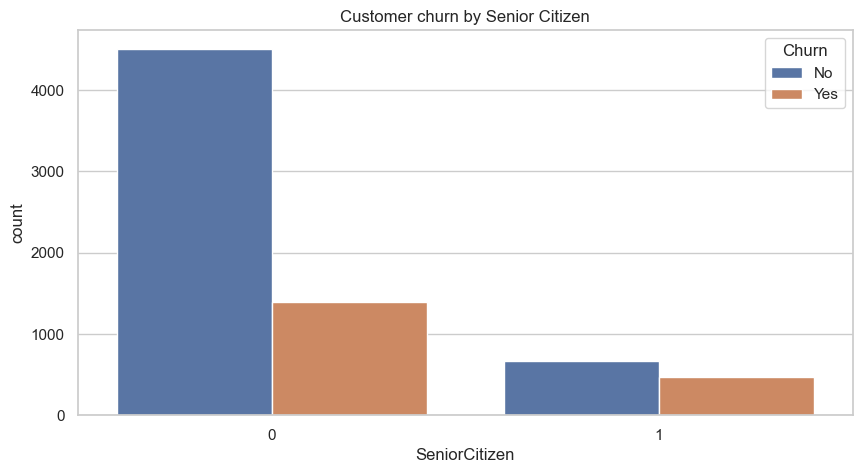

In [266]:
plt.figure(figsize=(10,5))
sb.countplot(x="SeniorCitizen", data =df2 , hue = "Churn")
plt.title("Customer churn by Senior Citizen")

The churn rate in customer who are not senior citizen is high but if you look at the proportion of churners, the Senior citizens have the highest churners because more than half of them are churners.

Text(0.5, 1.0, 'Customer churn by Partner')

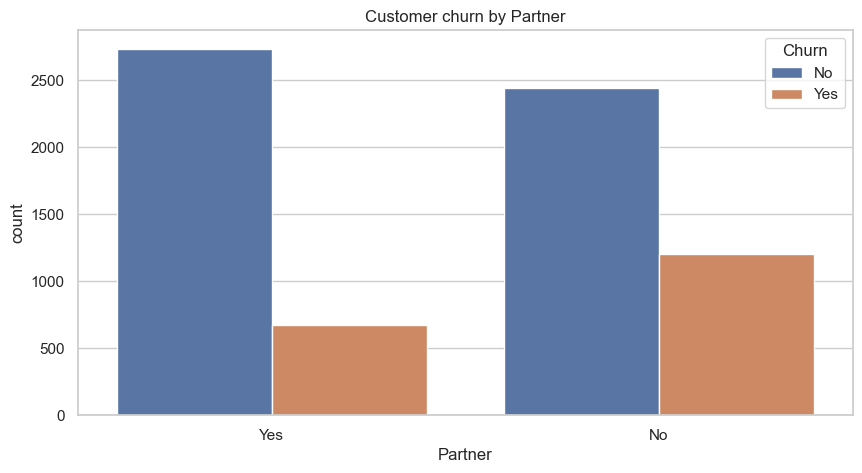

In [267]:
plt.figure(figsize=(10,5))
sb.countplot(x="Partner", data =df2 , hue = "Churn")
plt.title("Customer churn by Partner")

customers wihout partner churn the most

Text(0.5, 1.0, 'Customer churn by Dependents')

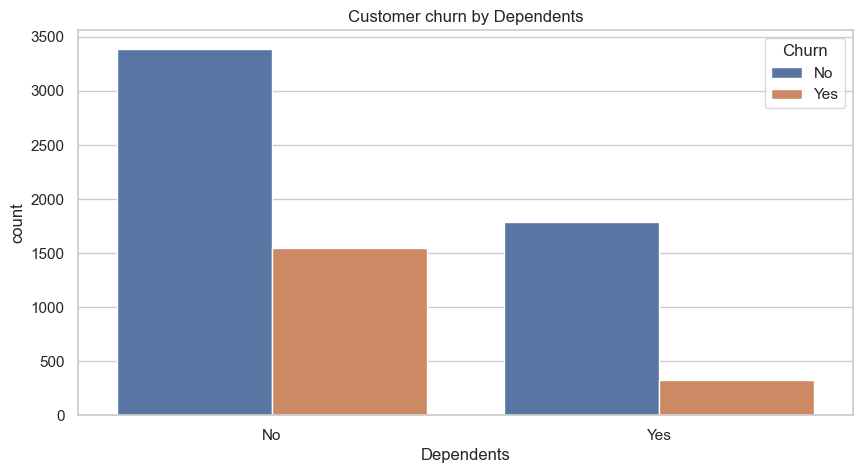

In [268]:
plt.figure(figsize=(10,5))
sb.countplot(x="Dependents", data =df2 , hue = "Churn")
plt.title("Customer churn by Dependents")

customer who do not have dependents churn the most

Text(0.5, 1.0, 'Customer churn by Streaming Movies')

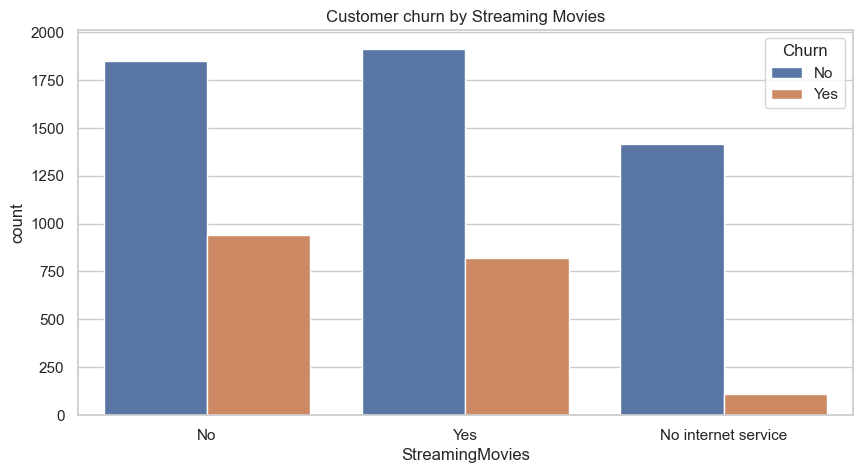

In [269]:
plt.figure(figsize=(10,5))
sb.countplot(x="StreamingMovies", data =df2 , hue = "Churn")
plt.title("Customer churn by Streaming Movies")

Streaming movies have little impact on churns because looking at the counts the no of those who stream movies are slightly higher than those that do not but the churn rate of those who do not stream movies is higher .

Text(0.5, 1.0, 'Customer churn by Streaming TV')

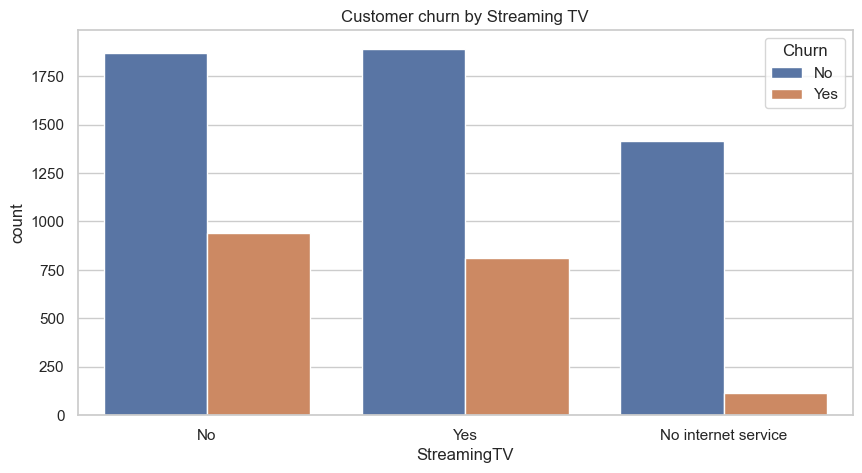

In [270]:
plt.figure(figsize=(10,5))
sb.countplot(x="StreamingTV", data =df2 , hue = "Churn")
plt.title("Customer churn by Streaming TV")

Streaming TVs have little impact on churns

## Multivariate Analysis

<Axes: xlabel='Contract', ylabel='TotalCharges'>

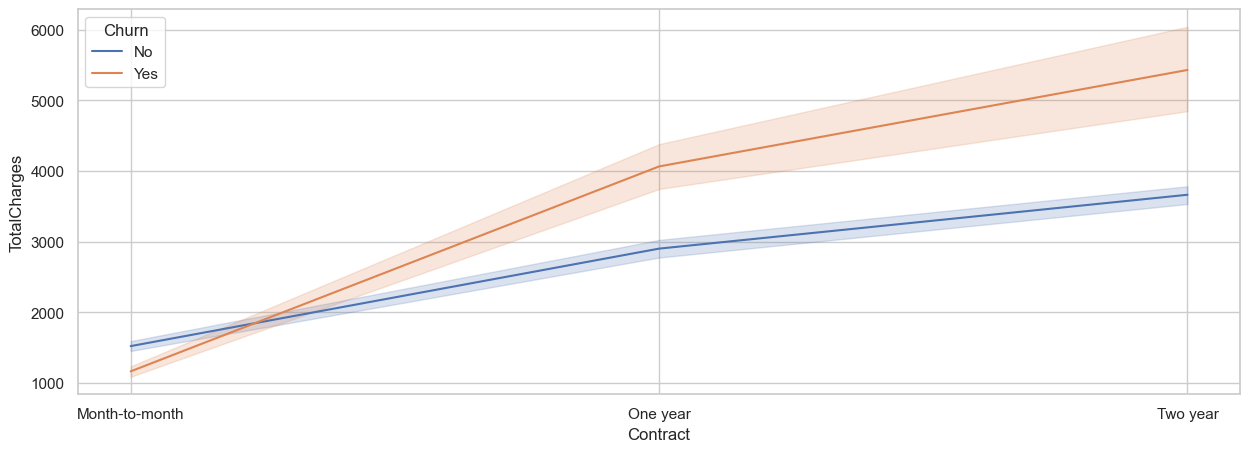

In [120]:
plt.figure(figsize=(15,5))
sb.lineplot(x="Contract",y="TotalCharges",data = df2, hue ="Churn")

the longer the contract type then the higher the total charges and increase in churn rate.

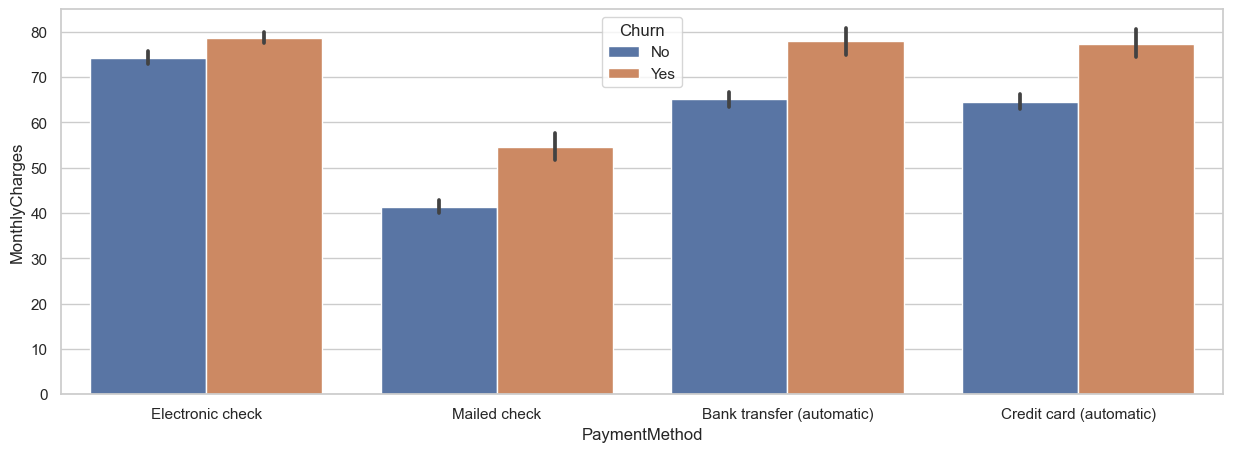

In [121]:
plt.figure(figsize=(15,5))
sb.barplot(x="PaymentMethod",y = "MonthlyCharges", data =df2 , hue = "Churn");

the payment methods with higher monthly charges has the highest churn rate

C:\Users\1040 G3\AppData\Local\Temp\ipykernel_1964\2290858064.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.zeros_like(df2.corr(), dtype=np.bool)
C:\Users\1040 G3\AppData\Local\Temp\ipykernel_1964\2290858064.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df2.corr(), dtype=np.bool)
C:\Users\1040 G3\AppData\Local\Temp\ipykernel_1964\2290858064.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will

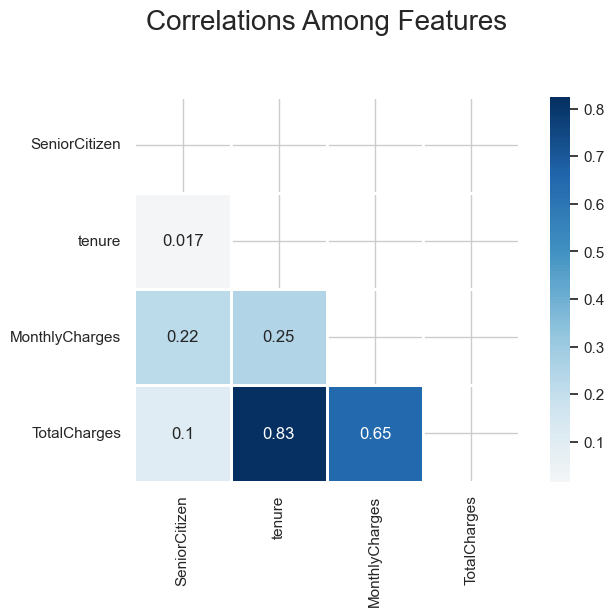

In [207]:
## heatmeap to see the correlation between features. 

mask = np.zeros_like(df2.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sb.set_style('whitegrid')
plt.subplots(figsize = (8,5))
sb.heatmap(df2.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu',
            linewidths=.9, 
            linecolor='white',
            fmt='.2g',
            center = 0,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20, pad = 40);

- there is a strong positive relationship between tenure age and Total charges
- there is also a positive relationship between monthly charges and total charges

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

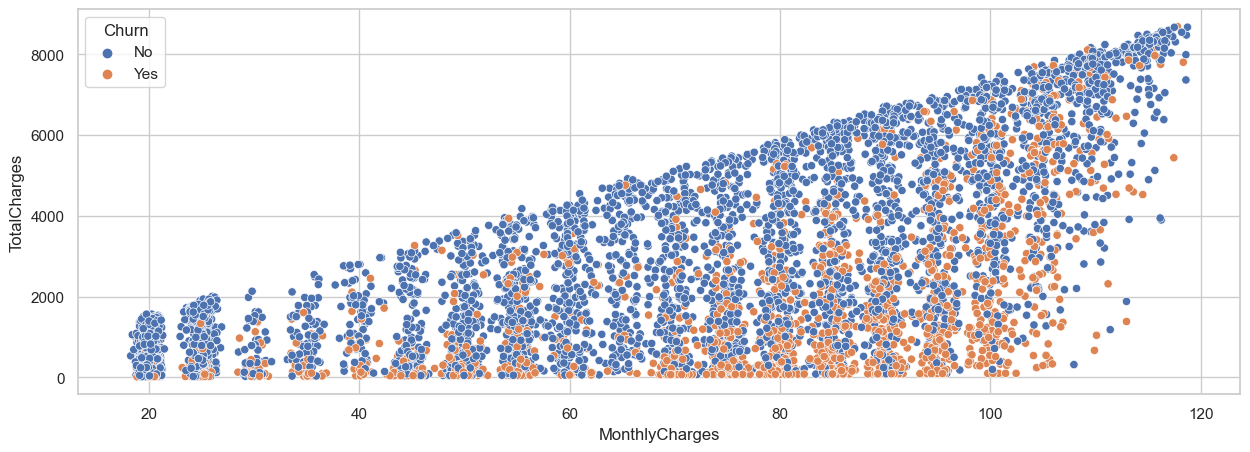

In [273]:
plt.figure(figsize=(15,5))
sb.scatterplot(x="MonthlyCharges",y="TotalCharges",data = df2, hue ="Churn")

- there is very high churn rate as monthly charge increases
- lower churn rate as total charge increases
- very low churn rate with cheaper monthly charges

### General observation.

- There is generally high churn in customers who do not use device protection, online security service, online device service and tech support.
- There is low churn rate in customers who are subscribed to 2 years contract and  customers with no internet service 
- Gender, multiple lines, movies and TVs streaming has little to no effect on churn rate.


## Feature Engineering
- Encode categorical variable
- segment data into predictor and target variable
- Scale numerical column
- split dataset to training and test


In [189]:
df3.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [191]:
# drop the customer id column since it is not useful to the predictive model

df3.drop('customerID', axis=1, inplace=True)

In [194]:
# we perform variable encoding by converting the categorical data to numerical dummies using the one hot encoder

df3 = pd.get_dummies(df3,columns=['gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn'],drop_first=True)

In [195]:
df3.head(2)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [215]:
# segment data into predictor and target variable( x is predictor, y is target)

x= df3.drop('Churn_Yes',axis=1)
y = df3['Churn_Yes']

In [216]:
#scale the data set
#importing the standard scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)

In [290]:
#split the dataset into training dataset and testing set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(scaled_x,y,test_size=0.2, random_state=42)

## Machine Learning

In [291]:
#importing libraries
#classifier libraries
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier
from sklearn.svm import LinearSVC ,SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

# evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix,classification_report

In [292]:
# Logistic Regression
#instantiate and fit the model

logreg = LogisticRegression()
logreg.fit(x_train, y_train)

# create a predictive model
ly_pred = logreg.predict(x_test)

# model evaluation
print("Logistic Regression")
print("classification report: \n", classification_report(y_test,ly_pred))

Logistic Regression
classification report: 
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409



this model performs fairly

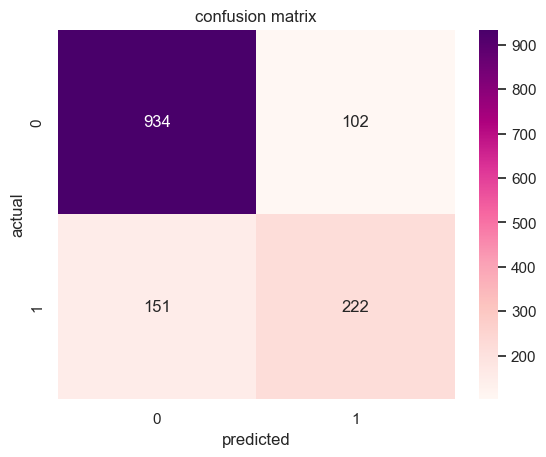

In [293]:
# create a confusion matrix for the logistic regression model
lr = confusion_matrix(y_test, ly_pred)

# visualize the confusion matrix
sb.heatmap(lr, annot = True, cmap = "RdPu", fmt = "g")
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusion matrix")
plt.show()

In [294]:
# random forest classifier
#instantiate and fit the model

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

# create a predictive model
rfy_pred = rf.predict(x_test)

# model evaluation
print("Random Forest classifier")
print("classification report: \n", classification_report(y_test,rfy_pred))

Random Forest classifier
classification report: 
               precision    recall  f1-score   support

           0       0.83      0.92      0.87      1036
           1       0.67      0.47      0.55       373

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.79      0.80      0.79      1409



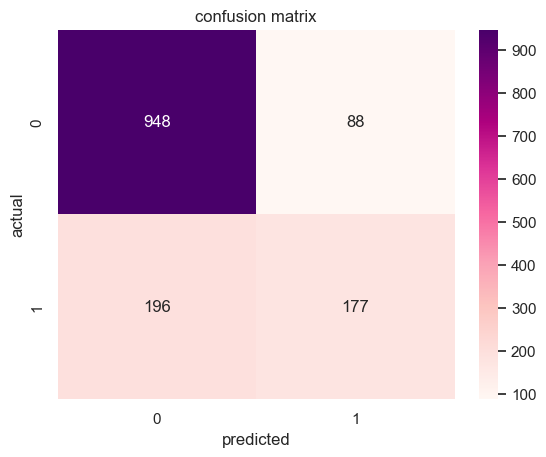

In [295]:
# create a confusion matrix for the random forest classifier model
rfy = confusion_matrix(y_test, rfy_pred)

# visualize the confusion matrix
sb.heatmap(rfy, annot = True, cmap = "RdPu", fmt = "g")
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusion matrix")
plt.show()

In [296]:
# k nearest neighbor classifier
#instantiate and fit the model

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

# create a predictive model
knny_pred = knn.predict(x_test)

# model evaluation
print("k nearest neighbor classifier")
print("classification report: \n", classification_report(y_test,knny_pred))

k nearest neighbor classifier
classification report: 
               precision    recall  f1-score   support

           0       0.83      0.86      0.85      1036
           1       0.57      0.52      0.54       373

    accuracy                           0.77      1409
   macro avg       0.70      0.69      0.70      1409
weighted avg       0.76      0.77      0.77      1409



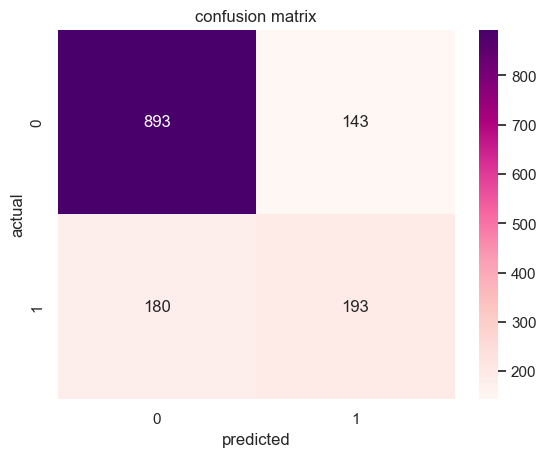

In [297]:
# create a confusion matrix for the k nearest neighbor classifier model
knny = confusion_matrix(y_test, knny_pred)

# visualize the confusion matrix
sb.heatmap(knny, annot = True, cmap = "RdPu", fmt = "g")
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusion matrix")
plt.show()

In [298]:
# XGB Classifier
#instantiate and fit the model

xgb = XGBClassifier()
xgb.fit(x_train, y_train)

# create a predictive model
xgby_pred = xgb.predict(x_test)

# model evaluation
print("XGB Classifier")
print("classification report: \n", classification_report(y_test,xgby_pred))

XGB Classifier
classification report: 
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.67      0.52      0.59       373

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.80      1409



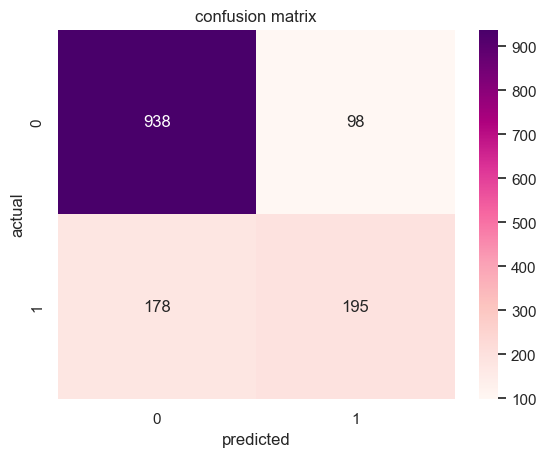

In [299]:
# create a confusion matrix for the XGBClassifier model
xgby = confusion_matrix(y_test, xgby_pred)

# visualize the confusion matrix
sb.heatmap(xgby, annot = True, cmap = "RdPu", fmt = "g")
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusion matrix")
plt.show()

In [300]:
# Stochastic gradient descent Classifier(SGD)
#instantiate and fit the model

sgd = SGDClassifier()
sgd.fit(x_train, y_train)

# create a predictive model
sgdy_pred = sgd.predict(x_test)

# model evaluation
print("SGD Classifier")
print("classification report: \n", classification_report(y_test,sgdy_pred))

SGD Classifier
classification report: 
               precision    recall  f1-score   support

           0       0.80      0.94      0.87      1036
           1       0.69      0.36      0.47       373

    accuracy                           0.79      1409
   macro avg       0.74      0.65      0.67      1409
weighted avg       0.77      0.79      0.76      1409



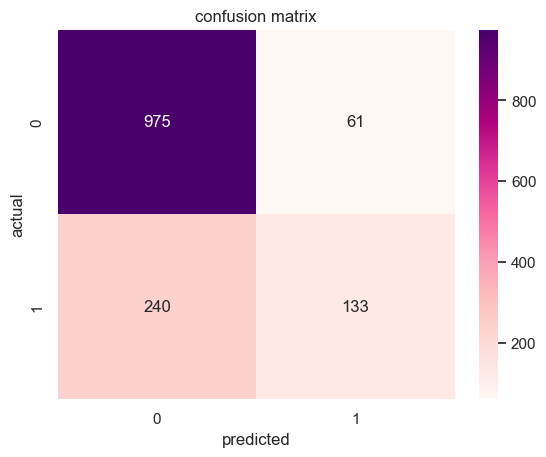

In [301]:
# create a confusion matrix for the SGD Classifier model
sgdy = confusion_matrix(y_test, sgdy_pred)

# visualize the confusion matrix
sb.heatmap(sgdy, annot = True, cmap = "RdPu", fmt = "g")
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusion matrix")
plt.show()

In [302]:
# naive bayes classifier
#instantiate and fit the model

nb = GaussianNB()
nb.fit(x_train, y_train)

# create a predictive model
nby_pred = nb.predict(x_test)

# model evaluation
print("Gaussian NB")
print("classification report: \n", classification_report(y_test,nby_pred))

Gaussian NB
classification report: 
               precision    recall  f1-score   support

           0       0.94      0.58      0.72      1036
           1       0.44      0.89      0.59       373

    accuracy                           0.67      1409
   macro avg       0.69      0.74      0.65      1409
weighted avg       0.81      0.67      0.68      1409



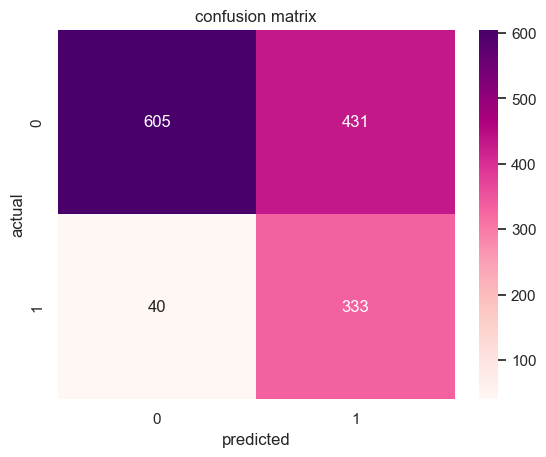

In [303]:
# create a confusion matrix for the naive bayes model
nby = confusion_matrix(y_test, nby_pred)

# visualize the confusion matrix
sb.heatmap(nby, annot = True, cmap = "RdPu", fmt = "g")
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusion matrix")
plt.show()

In [304]:
# Decision Tree Classifier
#instantiate and fit the model

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

# create a predictive model
dty_pred = dt.predict(x_test)

# model evaluation
print("Decision Tree Classifier")
print("classification report: \n", classification_report(y_test,dty_pred))

Decision Tree Classifier
classification report: 
               precision    recall  f1-score   support

           0       0.80      0.80      0.80      1036
           1       0.44      0.45      0.45       373

    accuracy                           0.70      1409
   macro avg       0.62      0.62      0.62      1409
weighted avg       0.71      0.70      0.71      1409



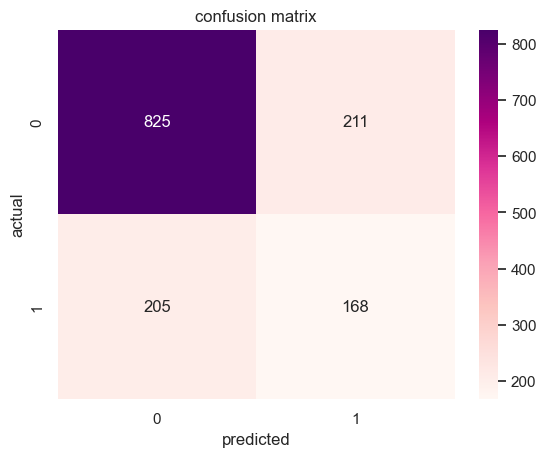

In [305]:
# create a confusion matrix for the Decision Tree model
dty = confusion_matrix(y_test, dty_pred)

# visualize the confusion matrix
sb.heatmap(dty, annot = True, cmap = "RdPu", fmt = "g")
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusion matrix")
plt.show()

In [306]:
# Support Vector Classifier
#instantiate and fit the model

svc = SVC()
svc.fit(x_train, y_train)

# create a predictive model
svcy_pred = svc.predict(x_test)

# model evaluation
print("Support Vector Classifier")
print("classification report: \n", classification_report(y_test,svcy_pred))

Support Vector Classifier
classification report: 
               precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.69      0.53      0.60       373

    accuracy                           0.81      1409
   macro avg       0.77      0.72      0.74      1409
weighted avg       0.80      0.81      0.81      1409



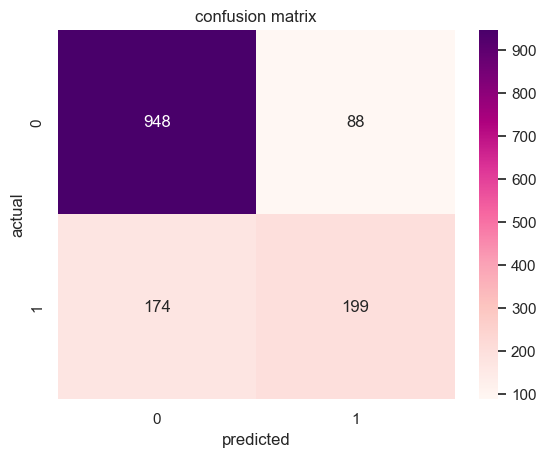

In [307]:
# create a confusion matrix for the Support Vector model
svcy = confusion_matrix(y_test, svcy_pred)

# visualize the confusion matrix
sb.heatmap(svcy, annot = True, cmap = "RdPu", fmt = "g")
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusion matrix")
plt.show()

In [312]:
# applying 8 machine learning algorithms to the dataset

classifiers = [[XGBClassifier(),"XGB Classifier"],
             [RandomForestClassifier(),"Random Forest"],
             [KNeighborsClassifier(),"K-Nearest Neighbours"],
             [SGDClassifier(),"SGD Classifier"],
             [SVC(), "SVC"],
             [GaussianNB(),"Naive Bayes"],
             [DecisionTreeClassifier(random_state = 42), "Decision tree"],
             [LogisticRegression(),"Logistic Regression"]
             ]

In [313]:
acc_list = {}
precision_list = {}
recall_list = {}
roc_list = {}

for classifier in classifiers:
    model = classifier[0]
    model.fit(x_train, y_train)
    model_name = classifier[1]
    
    pred = model.predict(x_test)
    
    a_score = accuracy_score(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    
    acc_list[model_name] = ([str(round(a_score*100, 2)) + "%"])
    precision_list[model_name] = ([str(round(p_score*100, 2)) + "%"])
    recall_list[model_name] = ([str(round(r_score*100, 2)) + "%"])
    roc_list[model_name] = ([str(round(roc_score*100, 2)) + "%"])
    
    if model_name != classifiers[-1][1]:
        print(" ")

In [314]:
print("Accuracy score")
ml = pd.DataFrame(acc_list)
ml.head()

Accuracy score


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,80.41%,79.91%,77.08%,80.34%,81.41%,66.57%,70.69%,82.04%


In [315]:
print("precision")
m2 = pd.DataFrame(precision_list)
m2.head()

precision


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,66.55%,66.3%,57.44%,65.0%,69.34%,43.59%,44.71%,68.52%


In [316]:
print("Recall")
m3 = pd.DataFrame(recall_list)
m3.head()

Recall


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,52.28%,49.06%,51.74%,55.76%,53.35%,89.28%,45.31%,59.52%


In [317]:
print("ROC score")
m4 = pd.DataFrame(roc_list)
m4.head()

ROC score


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,71.41%,70.04%,68.97%,72.48%,72.43%,73.84%,62.57%,74.84%


Since the business main objective is to accurately identify and predict as many customers churn inorder to take proactive measures to retain them ,then the best predictive model for this business would be 
- Naive Bayes which has high Recall of 89.28%
- Secondly, logistics Regression which has ROC curve of 74.84% 